Import dependencies

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Data collection

In [23]:
insurance_dataset=pd.read_csv("/content/insurance.csv")

In [24]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [26]:
insurance_dataset.shape

(1338, 7)

In [27]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [28]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


categorical features :

*   Sex
*   Smooker
*   region



Data analysis

In [29]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-30-c0a7baa1fe1f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset["age"])


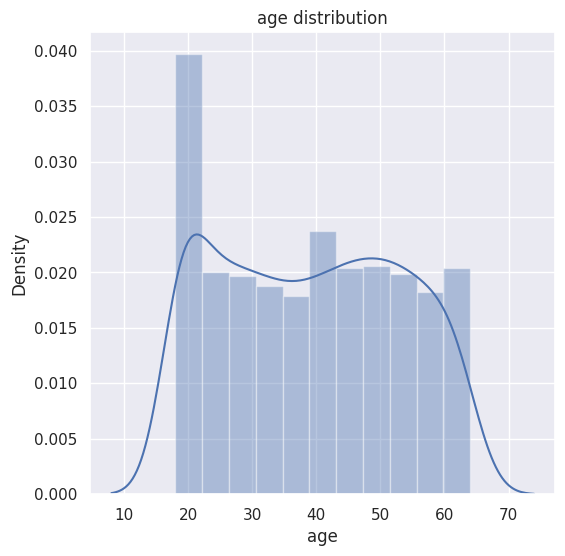

In [30]:
# distribution of age
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset["age"])
plt.title('age distribution')
plt.show()

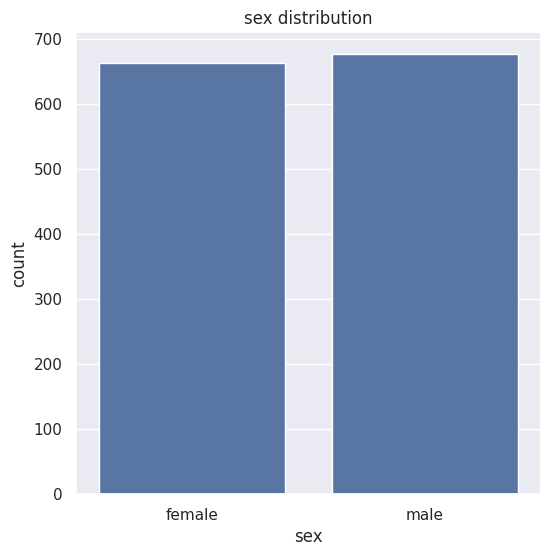

In [31]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=insurance_dataset)
plt.title('sex distribution')
plt.show()

In [32]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-35-75a9ee44bf5d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset["bmi"])


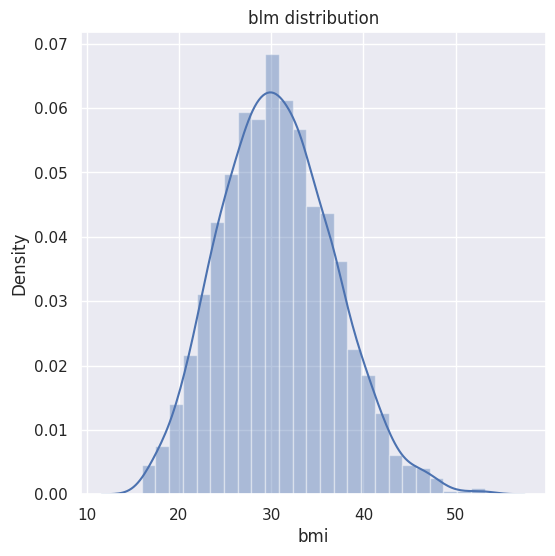

In [35]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset["bmi"])
plt.title('blm distribution')
plt.show()

normal distribution
normal BMI Range --> 18.5 TO 24.9


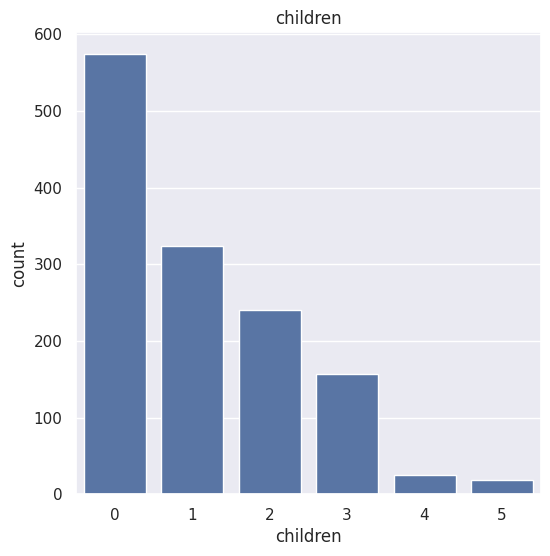

In [36]:
#children
plt.figure(figsize=(6,6))
sns.countplot(x='children' ,data=insurance_dataset)
plt.title('children')
plt.show()

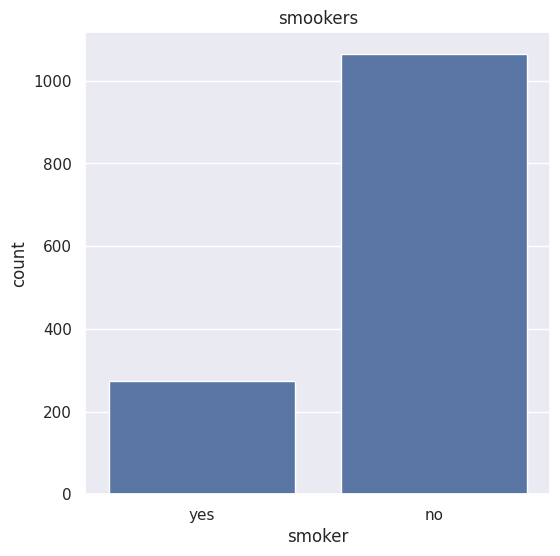

In [38]:
#smooker
plt.figure(figsize=(6,6))
sns.countplot(x='smoker' ,data=insurance_dataset)
plt.title('smookers')
plt.show()

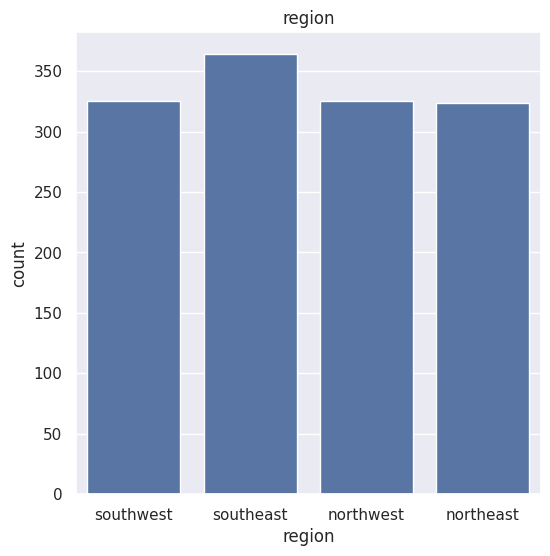

In [39]:
#resgion
plt.figure(figsize=(6,6))
sns.countplot(x='region' ,data=insurance_dataset)
plt.title('region')
plt.show()

<ipython-input-40-84f6903325ab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset["charges"])


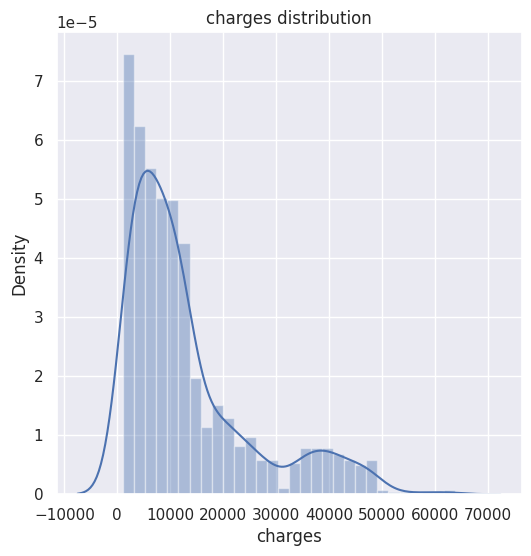

In [40]:
# distribution of charges
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset["charges"])
plt.title('charges distribution')
plt.show()

preprocessing

Encoding the categorical features

In [44]:
#encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

#encoding smoker column
insurance_dataset.replace({"smoker":{'yes':0,'no':1}},inplace=True)

#encoding region column
insurance_dataset.replace({"region":{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
print(insurance_dataset.head())


   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       0       1  16884.92400
1   18    0  33.770         1       1       0   1725.55230
2   28    0  33.000         3       1       0   4449.46200
3   33    0  22.705         0       1       3  21984.47061
4   32    0  28.880         0       1       3   3866.85520


Spliting the features and the target


In [46]:
x=insurance_dataset.drop(columns='charges',axis=1)
y=insurance_dataset['charges']
print(x)
print(y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


split the training and the testing dataset

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [50]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


Training the model

Linear regression model

In [54]:
regressor=LinearRegression()

In [55]:
regressor.fit(x_train,y_train)

LinearRegression()

Model evaluation

In [57]:
#prediction on training data
training_data_prediction=regressor.predict(x_train)

In [59]:
#R square value (from 0 to 1 ..close to 1 more performant* not in all cases )
r2_train=metrics.r2_score(y_train,training_data_prediction)
print("R square value = " , r2_train)

R square value =  0.751505643411174


In [61]:
#prediction on training data
testing_data_prediction=regressor.predict(x_test)

In [62]:
#R square value (from 0 to 1 ..close to 1 more performant* not in all cases )
r2_test=metrics.r2_score(y_test,testing_data_prediction)
print("R square value = " , r2_test)

R square value =  0.7447273869684076


Building a predective system

In [64]:
input_data=(31,1,25.74,0,1,0)
#change to numpy array
data_as_numpy_array=np.asarray(input_data)
#reshape the array
data_reshaped=data_as_numpy_array.reshape(1,-1)

prediction=regressor.predict(data_reshaped)
print("the insurance cost in usd",prediction)

the insurance cost in usd [3760.0805765]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
